# Итоговая работа

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

## Задание 1

In [25]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Поиск похожих пользователей

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(raitings, dense_output=False)
print(similarities)

[[1.         0.82602919 0.84921529 0.78340116 0.81917632 0.74118548
  0.72735828 0.80967522 0.91065982 0.86010776]
 [0.82602919 1.         0.81234325 0.84635337 0.87138052 0.82713107
  0.82629684 0.80026003 0.82526308 0.81968127]
 [0.84921529 0.81234325 1.         0.84669374 0.78394299 0.79097985
  0.67616223 0.76289552 0.82112077 0.91873051]
 [0.78340116 0.84635337 0.84669374 1.         0.69153409 0.78665792
  0.83274211 0.82934667 0.7770666  0.8588687 ]
 [0.81917632 0.87138052 0.78394299 0.69153409 1.         0.7764434
  0.78200468 0.81236869 0.87948477 0.84574789]
 [0.74118548 0.82713107 0.79097985 0.78665792 0.7764434  1.
  0.74011801 0.84451685 0.80622876 0.85514908]
 [0.72735828 0.82629684 0.67616223 0.83274211 0.78200468 0.74011801
  1.         0.82669174 0.81130044 0.79154718]
 [0.80967522 0.80026003 0.76289552 0.82934667 0.81236869 0.84451685
  0.82669174 1.         0.7981276  0.83682229]
 [0.91065982 0.82526308 0.82112077 0.7770666  0.87948477 0.80622876
  0.81130044 0.798127

In [27]:
similar_users = np.zeros(shape=(len(similarities),2))
for i in range(len(similarities)):
    min_i = np.argmin(similarities[i])
    similar_users[i] = [i, min_i]
similar_users

array([[0., 6.],
       [1., 7.],
       [2., 6.],
       [3., 4.],
       [4., 3.],
       [5., 6.],
       [6., 2.],
       [7., 2.],
       [8., 3.],
       [9., 6.]])

b) Сжатие до 5-ти признаков

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
raitings_reduced = pca.fit_transform(raitings)

In [29]:
raitings_reduced

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

## Задание 2

In [32]:
import sympy as sp
from scipy.misc import derivative

In [36]:
x = sp.symbols('x')
func = sp.tan(sp.sin(x) + sp.cos(2*x + 3)) ** 2
diff = sp.diff(func, x)
print('Производная:', diff,
      'Производная в точке x=1:', diff.evalf(subs={x: 1}), sep='\n')

Производная:
2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
Производная в точке x=1:
55.3859176353379


## Задание 3

In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

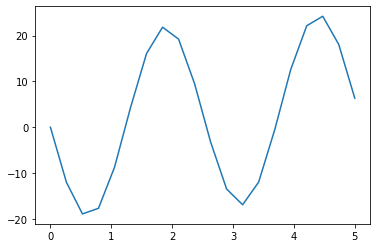

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [ ]:
start_x = [(-100, -100), (-100, 100), (0, 0), (100, 100), (100, -100)]
methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']
results = dict()

# Перебираем различные методы оптимизации и начальные точки
for method_ in methods:
    try:
        for x_ in start_x:
            res = minimize(error, tuple(x_), method=method_)
            results[(method_, x_)] = (res.fun, res.x)
    except:
        continue

best_params = min(results.items(), key=lambda x: x[1][0])
print('Лучший метод:', best_params[0][0],
      'Начальная точка:', best_params[0][1],
      'Абсолютная ошибка:', best_params[1][0],
      'Значения параметров a, b:', [*best_params[1][1]], sep='\n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Лучший метод:
Nelder-Mead
Начальная точка:
(100, -100)
Абсолютная ошибка:
0.0001843642231484921
Значения параметров a, b:
[3.00000003767632, -145.75662472324618]


## Задание 4

In [53]:
random_values = np.random.randint(1, 21, size=(1000, 50))

In [54]:
samples_means = np.array([x.mean() for x in random_values])

(array([  2.,  25.,  68., 179., 240., 252., 155.,  66.,  11.,   2.]),
 array([ 7.84 ,  8.378,  8.916,  9.454,  9.992, 10.53 , 11.068, 11.606,
        12.144, 12.682, 13.22 ]),
 <a list of 10 Patch objects>)

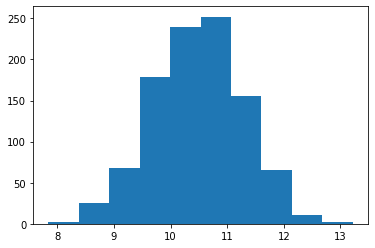

In [55]:
plt.hist(samples_means)

## Задание 5

In [38]:
m = np.array([[1, 4],
              [1, 1]])

In [42]:
w, v = np.linalg.eig(m)
print('Собственные числа:', w,
      'Собственные вектора:', v, sep='\n')

Собственные числа:
[ 3. -1.]
Собственные вектора:
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
